<a href="https://colab.research.google.com/github/egecnoob/IA_1/blob/main/Taller_2_2_3_Redes_Neuronales_Convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
# Cargar el dataset SVHN
datos, metadatos = tfds.load("svhn_cropped", as_supervised=True, with_info=True)
datos_entrenamiento, datos_pruebas = datos["train"], datos["test"]

In [ ]:
# Mostrar metadatos
print(metadatos)

tfds.core.DatasetInfo(
    name='svhn_cropped',
    full_name='svhn_cropped/3.1.0',
    description="""
    The Street View House Numbers (SVHN) Dataset is an image digit recognition
    dataset of over 600,000 digit images coming from real world data. Images are
    cropped to 32x32.
    """,
    homepage='http://ufldl.stanford.edu/housenumbers/',
    data_dir='/root/tensorflow_datasets/svhn_cropped/3.1.0',
    file_format=tfrecord,
    download_size=1.47 GiB,
    dataset_size=1.09 GiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'extra': <SplitInfo num_examples=531131, num_shards=8>,
        'test': <SplitInfo num_examples=26032, num_shards=1>,
        'train': <SplitInfo num_examples=73257, num_shards=1>

In [ ]:
# Nombres de clases (del 1 al 10, donde el 10 es el dígito 0)
nombres_clases = [str(i) for i in range(10)]

In [ ]:
# Normalización de imágenes
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32) / 255.0
    etiquetas = tf.cast(etiquetas, tf.int64)  # Asegura que las etiquetas sean int64
    etiquetas = tf.where(etiquetas == 10, tf.constant(0, dtype=tf.int64), etiquetas)
    return imagenes, etiquetas


datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

In [ ]:
# Cachear para rendimiento
datos_entrenamiento = datos_entrenamiento.cache().shuffle(10000).batch(64).prefetch(tf.data.AUTOTUNE)
datos_pruebas = datos_pruebas.batch(64).cache().prefetch(tf.data.AUTOTUNE)



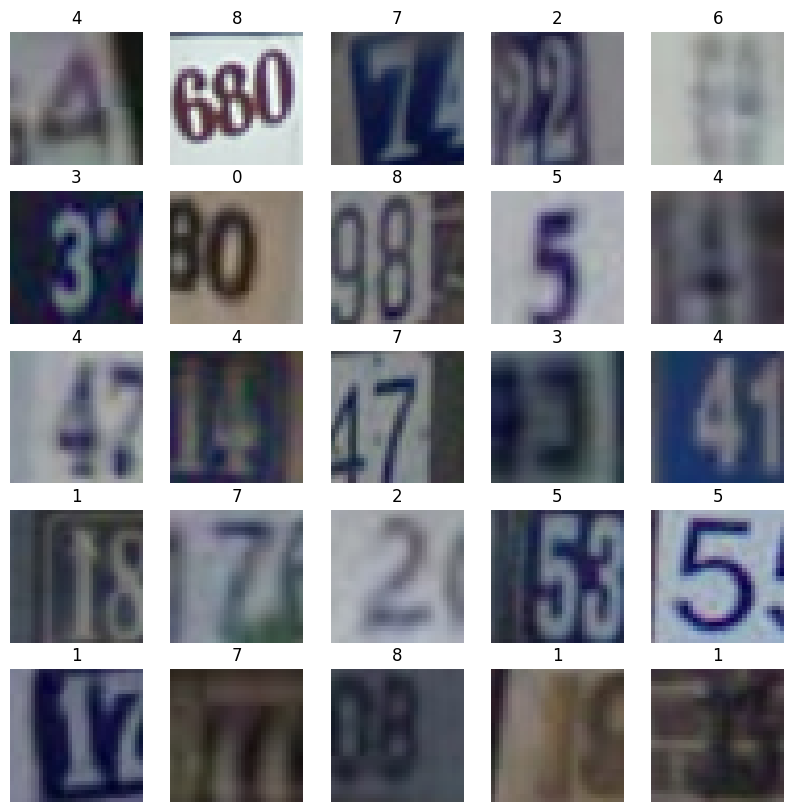

In [ ]:
# Mostrar imágenes de ejemplo
plt.figure(figsize=(10, 10))
# Muestra antes de aplicar .batch()
for i, (imagen, etiqueta) in enumerate(datos["train"].map(normalizar).take(25)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(imagen.numpy())
    plt.title(str(etiqueta.numpy()))
    plt.axis('off')

plt.show()


In [ ]:
# Crear modelo CNN
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Entrenar modelo
modelo.fit(
    datos_entrenamiento,
    epochs=10,
    validation_data=datos_pruebas
)



Epoch 1/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 128s 108ms/step - accuracy: 0.5758 - loss: 1.2609 - val_accuracy: 0.8419 - val_loss: 0.5433
Epoch 2/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 107s 93ms/step - accuracy: 0.8705 - loss: 0.4425 - val_accuracy: 0.8817 - val_loss: 0.4136
Epoch 3/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 143s 94ms/step - accuracy: 0.8942 - loss: 0.3570 - val_accuracy: 0.8949 - val_loss: 0.3731
Epoch 4/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 147s 98ms/step - accuracy: 0.9113 - loss: 0.3060 - val_accuracy: 0.9006 - val_loss: 0.3525
Epoch 5/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 106s 92ms/step - accuracy: 0.9205 - loss: 0.2717 - val_accuracy: 0.9098 - val_loss: 0.3376
Epoch 6/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 106s 93ms/step - accuracy: 0.9282 - loss: 0.2438 - val_accuracy: 0.9109 - val_loss: 0.3350
Epoch 7/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 106s 93ms/step - accuracy: 0.9359 - loss: 0.2199 - val_accuracy: 0.9141 - val_loss: 0.3328
Epoch 8/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 142s 93ms/step - accuracy:

In [ ]:
# Evaluar sobre conjunto de prueba
loss, accuracy = modelo.evaluate(datos_pruebas)
print(f"Precisión en pruebas: {accuracy*100:.2f}%")



407/407 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9070 - loss: 0.4210
Precisión en pruebas: 90.64%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 


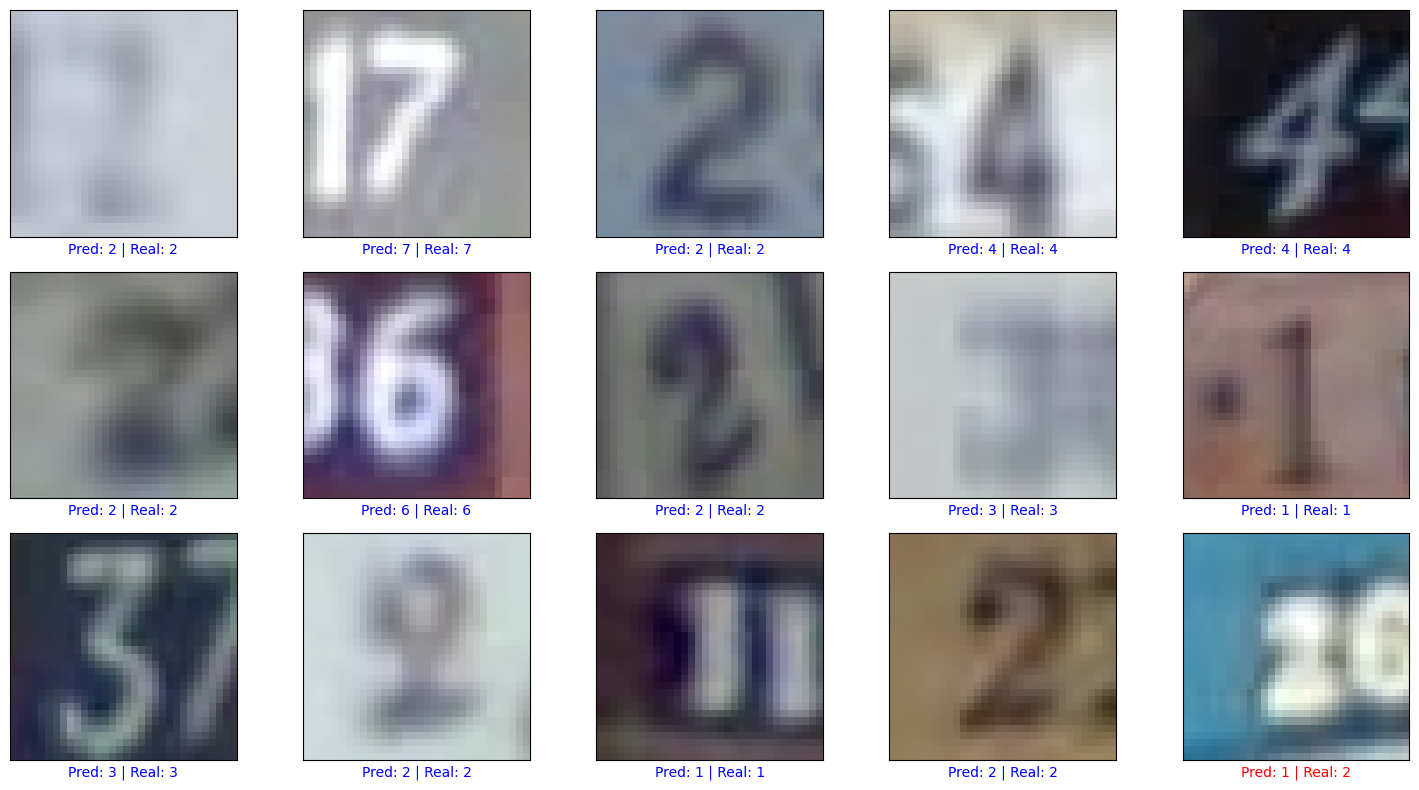

In [ ]:
# Visualización de predicciones
for imagenes, etiquetas in datos_pruebas.take(1):
    predicciones = modelo.predict(imagenes)
    imagenes = imagenes.numpy()
    etiquetas = etiquetas.numpy()

def mostrar_predicciones(i, predicciones, etiquetas, imagenes):
    pred = np.argmax(predicciones[i])
    etiqueta = etiquetas[i]
    color = "blue" if pred == etiqueta else "red"

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagenes[i])
    plt.xlabel(f"Pred: {pred} | Real: {etiqueta}", color=color)

plt.figure(figsize=(15, 8))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    mostrar_predicciones(i, predicciones, etiquetas, imagenes)
plt.tight_layout()
plt.show()